# Prepare a model for glass classification using KNN

In [1]:
# IMPORT THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data set 'glass.csv'
df = pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# BASIC INFO AND EDA ON THE DATA SET

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


In [9]:
df.shape

(213, 10)

In [10]:
df.describe().round(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.00,213.00,213.00,213.00,213.00,213.00,213.00,213.00,213.00,213.00
mean,1.52,13.40,2.68,1.45,72.66,0.50,8.95,0.18,0.06,2.79
std,0.00,0.82,1.44,0.50,0.77,0.65,1.43,0.50,0.10,2.11
min,1.51,10.73,0.00,0.29,69.81,0.00,5.43,0.00,0.00,1.00
25%,1.52,12.90,2.09,1.19,72.28,0.13,8.24,0.00,0.00,1.00
50%,1.52,13.30,3.48,1.36,72.79,0.56,8.60,0.00,0.00,2.00
75%,1.52,13.81,3.60,1.63,73.09,0.61,9.15,0.00,0.10,3.00
max,1.53,17.38,4.49,3.50,75.41,6.21,16.19,3.15,0.51,7.00


In [11]:
corel = df.corr()

In [12]:
corel

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


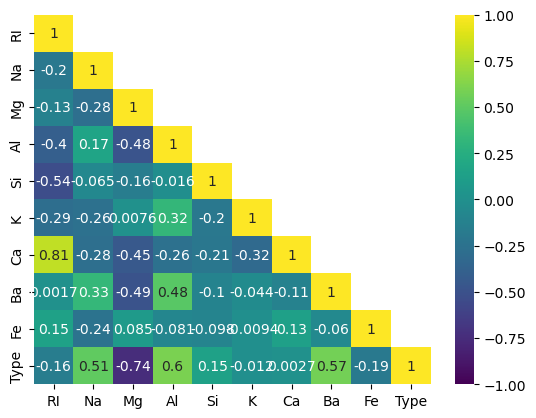

In [13]:
# heat map visualisation
sns.heatmap(data = corel,vmin = -1,vmax = +1,annot = True,cmap='viridis',mask = np.triu(corel,1));

# There is a negative correlation between Type and Magnesium and positive correlation between Refractive index and Calcium

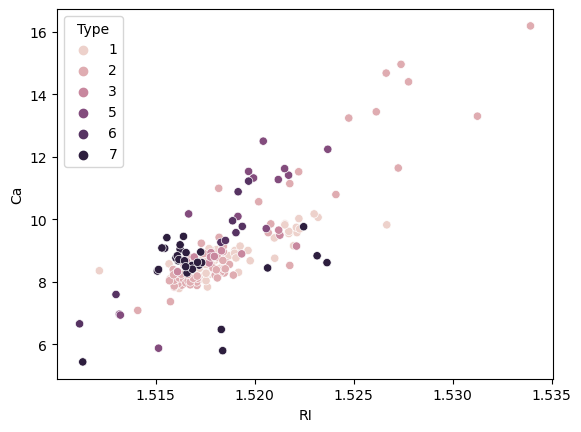

In [14]:
# visualisation of data 
sns.scatterplot(data = df, x = 'RI',y = 'Ca' ,hue='Type');

In [16]:
# import the libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [24]:
# scaling the data 
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df.iloc[:,:-1])
df_scaler

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

In [25]:
df_scaler = pd.DataFrame(df_scaler,columns = df.columns[:-1])

In [26]:
df_scaler.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301


In [27]:
x = df_scaler

In [28]:
y = df['Type']

In [29]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301
...,...,...,...,...,...,...,...,...,...
208,-0.699888,0.903249,-1.860172,2.891336,-0.058368,-0.642789,0.158812,1.778672,-0.588301
209,-0.494986,1.860605,-1.860172,1.092483,0.524398,-0.765554,-0.389506,2.844912,-0.588301
210,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301
211,-0.607351,1.197820,-1.860172,0.991424,1.236668,-0.765554,-0.333268,2.804676,-0.588301


In [30]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 213, dtype: int64

In [31]:
# create a range of odd values from 1 to 32 for k to try out and create a dictionery for store them
k = range(1,32)
param = {'n_neighbors':k}

In [32]:
# instantiate a Knearest classifier 
knn_gv = KNeighborsClassifier()

In [33]:
# create an instance of KNN model and Grid search cv and implement cross validation
kf = KFold(n_splits=10,shuffle=True,random_state=42)
gs_cv = GridSearchCV(knn_gv,param,cv = kf,scoring='accuracy')
gs_cv.fit(x,y)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 32, 2)}, scoring='accuracy')

In [34]:
# get the best parameters
gs_cv.best_params_

{'n_neighbors': 1}

In [35]:
# get the best model and predict the target and evaluate the model
gs_cv.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [36]:
# create an empty list to store the cross validation scores
# store the cross validation scores for each value of k in the list
cv_scores = []
for k_neig in k:
    knn = KNeighborsClassifier(n_neighbors=k_neig)
    cv_score = cross_val_score(knn,x,y,cv = kf,scoring='accuracy')
    cv_scores.append(cv_score.mean())

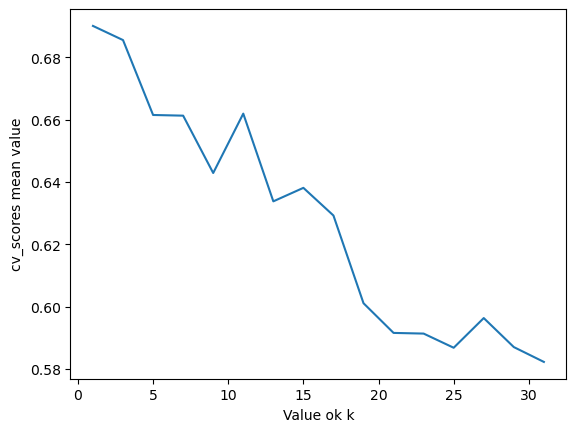

In [37]:
# plot a line plotusing cv_scores and k value
plt.plot(k,cv_scores)
plt.xlabel('Value ok k')
plt.ylabel('cv_scores mean value');

# from the above , we can say that k value 1 or 2 could be better

In [38]:
# create an instance of k_neighbour classifier with default parameters
# evaluate performance on cross validation
knn = KNeighborsClassifier(n_neighbors=1) 
cv_knn1 = cross_val_score(knn,x,y,cv = kf ,scoring='accuracy')
cv_knn1

array([0.63636364, 0.77272727, 0.68181818, 0.71428571, 0.71428571,
       0.66666667, 0.61904762, 0.85714286, 0.61904762, 0.61904762])

In [39]:
cv_knn1.mean()

0.69004329004329

In [40]:
# create an instance of k_neighbour classifier with default parameters
# evaluate performance on cross validation
knn = KNeighborsClassifier(n_neighbors=2)
cv_knn2 = cross_val_score(knn,x,y,cv = kf ,scoring='accuracy')
cv_knn2

array([0.68181818, 0.72727273, 0.63636364, 0.66666667, 0.66666667,
       0.71428571, 0.61904762, 0.95238095, 0.61904762, 0.71428571])

In [41]:
cv_knn2.mean()

0.6997835497835498

# With k value = 2 the model performance is good

# Prepare a final model with n_neighbours = 2

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
final_model = KNeighborsClassifier(n_neighbors=2)
final_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [46]:
pred_train = final_model.predict(x_train)

In [47]:
pred_test = final_model.predict(x_test)

In [48]:
pred_train

array([2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 5, 1, 5, 1, 1, 1, 1, 7, 2,
       2, 1, 2, 6, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 5, 2, 1, 1, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 3, 2, 2, 2, 1, 1, 7, 1, 1, 2, 2, 1, 1, 7, 6, 1, 1,
       2, 7, 3, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 3, 1, 1, 7, 5, 2, 5, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 7, 1, 2, 2, 1, 1, 1, 2, 1, 1, 7, 5, 7, 1,
       2, 1, 1, 2, 2, 2, 7, 7, 2, 1, 1, 1, 6, 2, 1, 5, 2, 7, 2, 6, 7, 1,
       1, 2, 1, 1, 7, 5, 1, 1, 2, 1, 1, 2, 7, 2, 2, 1, 3, 7, 1, 1, 1, 2,
       3, 1, 2, 2, 2, 2, 2, 7, 1, 7, 2, 2, 1, 2, 2, 2], dtype=int64)

In [49]:
pred_test

array([2, 7, 1, 7, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 6, 5, 7, 1, 2, 2, 1, 7,
       7, 7, 1, 5, 1, 1, 6, 1, 1, 2, 2, 2, 2, 7, 2, 1, 2, 2, 1, 1, 1],
      dtype=int64)

In [53]:
from sklearn.metrics import accuracy_score,classification_report
print("Accuracy", accuracy_score(y_test,pred_test)*100)

Accuracy 62.7906976744186


In [54]:
final_model.score(x_train,y_train)

0.8411764705882353

In [56]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           1       0.50      0.80      0.62        10
           2       0.56      0.60      0.58        15
           3       0.00      0.00      0.00         3
           5       0.50      0.33      0.40         3
           6       1.00      0.67      0.80         3
           7       1.00      0.78      0.88         9

    accuracy                           0.63        43
   macro avg       0.59      0.53      0.55        43
weighted avg       0.63      0.63      0.61        43



In [60]:
final_model1 = KNeighborsClassifier(n_neighbors=1)
final_model1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [61]:
pred_train1 = final_model1.predict(x_train)

In [62]:
pred_test1 = final_model1.predict(x_test)

In [63]:
pred_train1

array([2, 3, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 7, 2, 5, 1, 1, 2, 1, 7, 5,
       2, 1, 2, 6, 1, 1, 1, 1, 1, 2, 2, 3, 1, 2, 5, 2, 1, 3, 2, 2, 1, 2,
       2, 2, 1, 2, 1, 3, 2, 2, 2, 2, 1, 7, 1, 1, 2, 2, 1, 1, 7, 6, 1, 1,
       2, 7, 3, 1, 1, 2, 3, 2, 3, 2, 1, 1, 2, 3, 6, 1, 7, 5, 2, 5, 1, 1,
       2, 1, 2, 1, 7, 3, 2, 1, 7, 1, 2, 5, 1, 3, 1, 2, 1, 2, 7, 5, 7, 1,
       2, 1, 1, 2, 2, 2, 7, 7, 2, 1, 1, 1, 6, 2, 1, 5, 2, 7, 2, 6, 7, 1,
       1, 2, 1, 5, 7, 5, 1, 1, 2, 1, 1, 3, 7, 7, 2, 1, 3, 7, 1, 1, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 7, 1, 7, 2, 2, 1, 2, 6, 2], dtype=int64)

In [64]:
pred_test1

array([3, 7, 1, 7, 2, 2, 1, 3, 2, 1, 2, 5, 1, 2, 6, 5, 7, 1, 2, 2, 1, 7,
       7, 7, 1, 5, 1, 1, 6, 1, 1, 2, 2, 2, 2, 7, 5, 3, 2, 2, 1, 5, 1],
      dtype=int64)

In [65]:
print("Accuracy", accuracy_score(y_test,pred_test1)*100)

Accuracy 69.76744186046511


In [66]:
final_model1.score(x_train,y_train)

1.0

In [67]:
print(classification_report(y_test,pred_test1))

              precision    recall  f1-score   support

           1       0.62      0.80      0.70        10
           2       0.69      0.60      0.64        15
           3       0.33      0.33      0.33         3
           5       0.60      1.00      0.75         3
           6       1.00      0.67      0.80         3
           7       1.00      0.78      0.88         9

    accuracy                           0.70        43
   macro avg       0.71      0.70      0.68        43
weighted avg       0.73      0.70      0.70        43



# For n_neighbours = 1 , The model performance is improving better . So we can go with n_neighbours = 1